c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


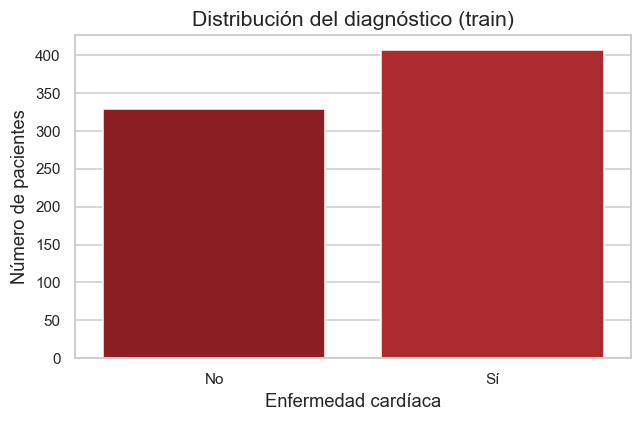

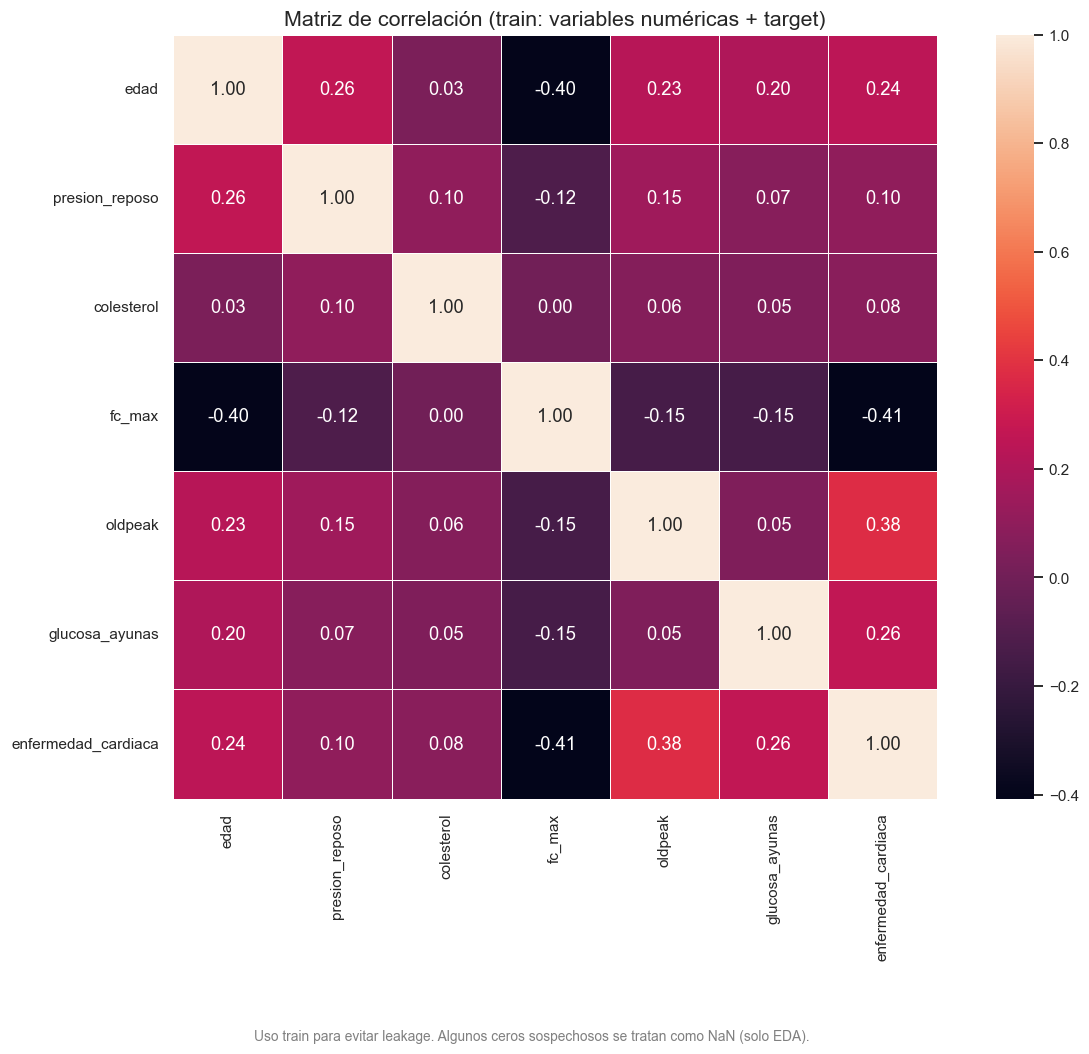

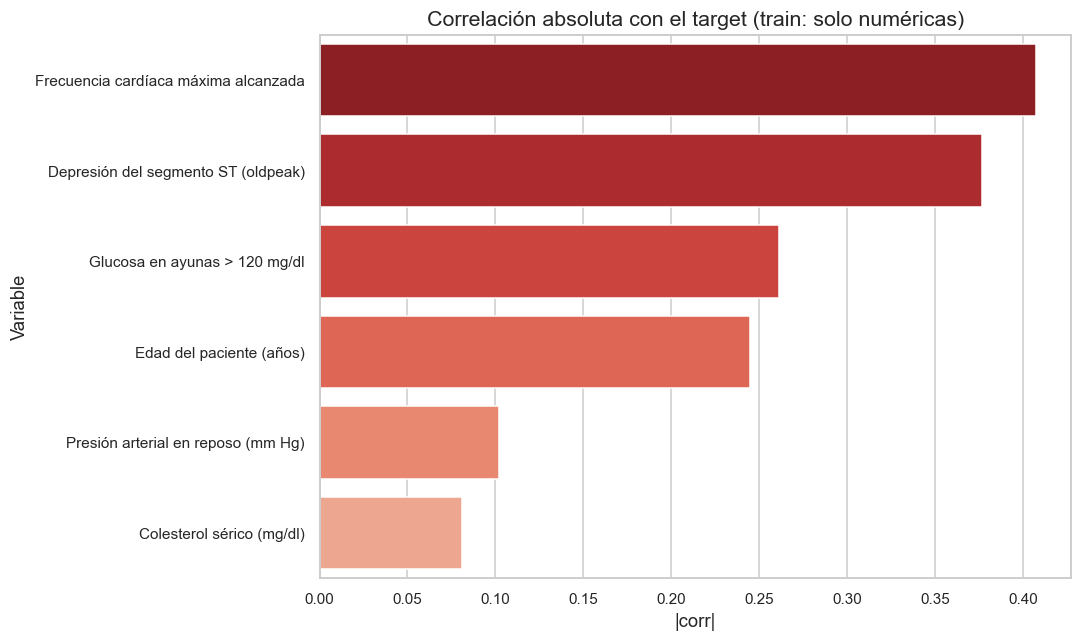

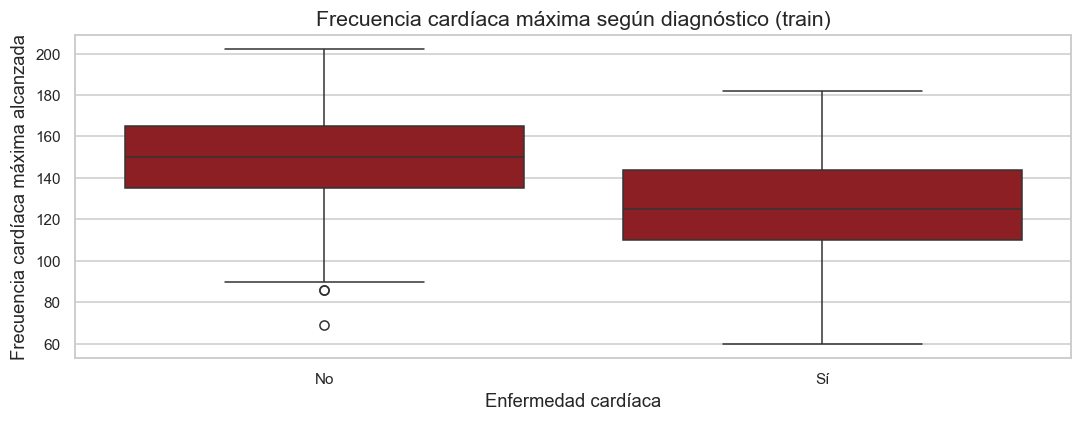

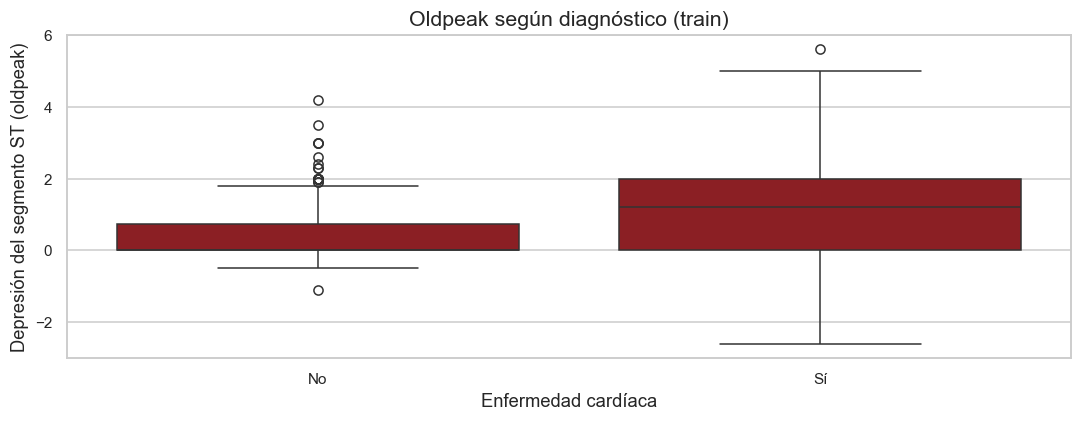

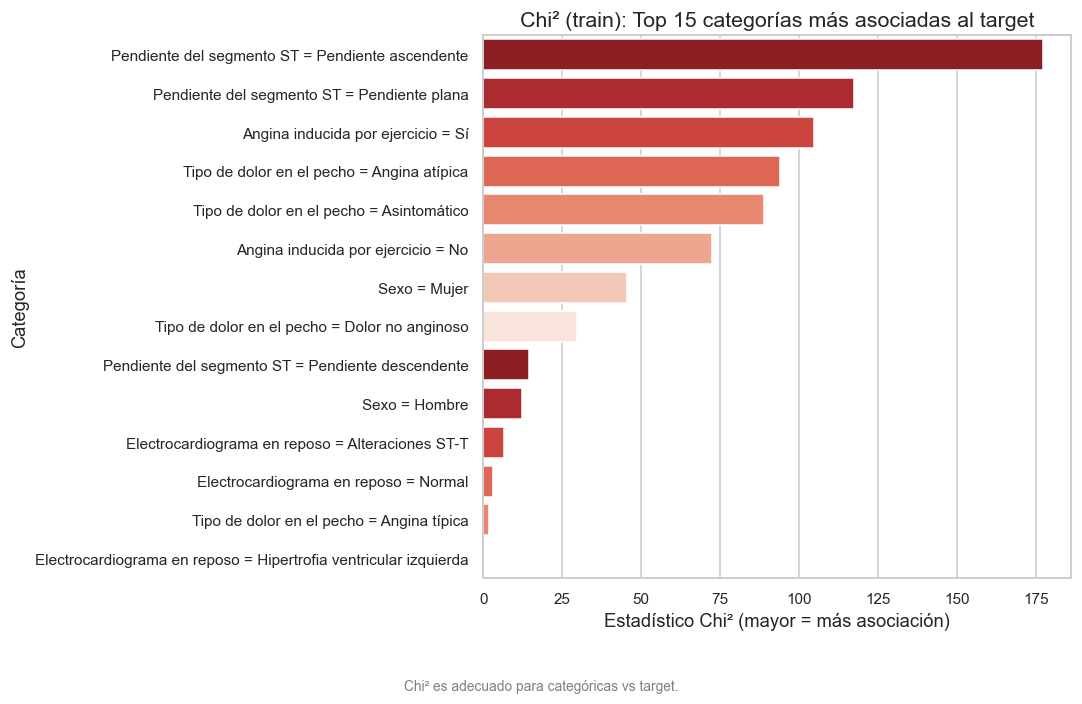

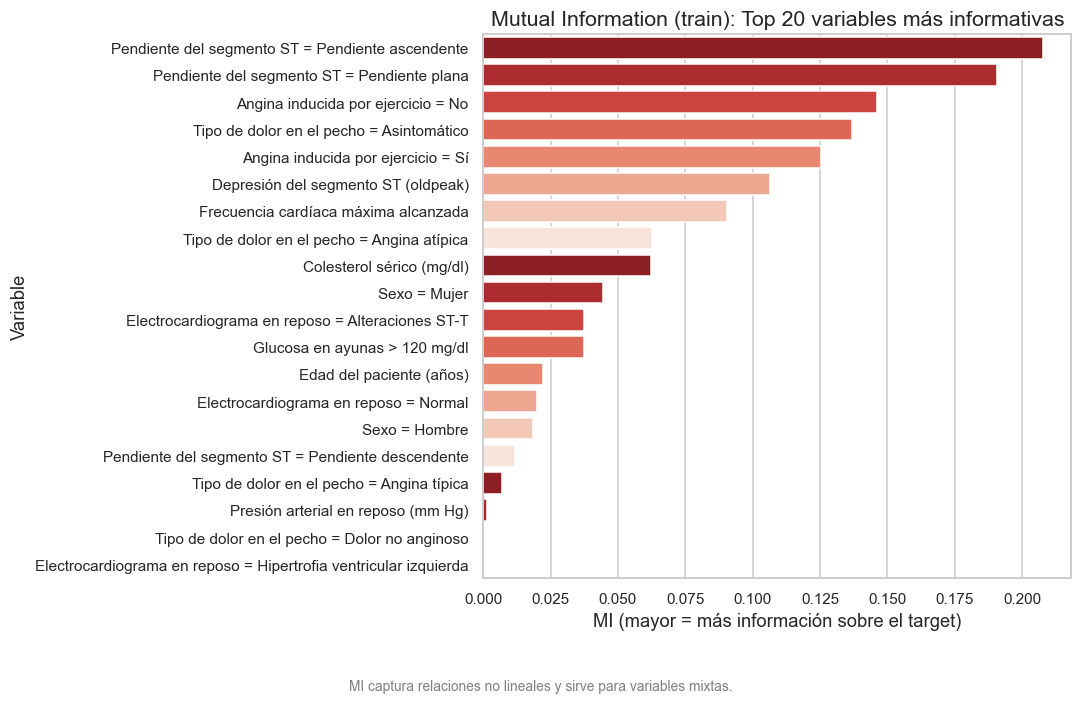

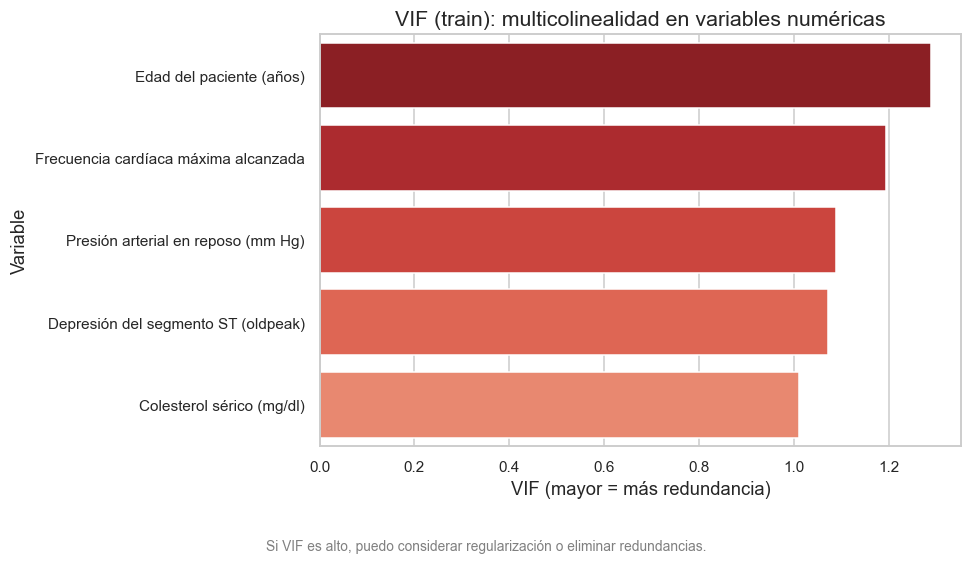

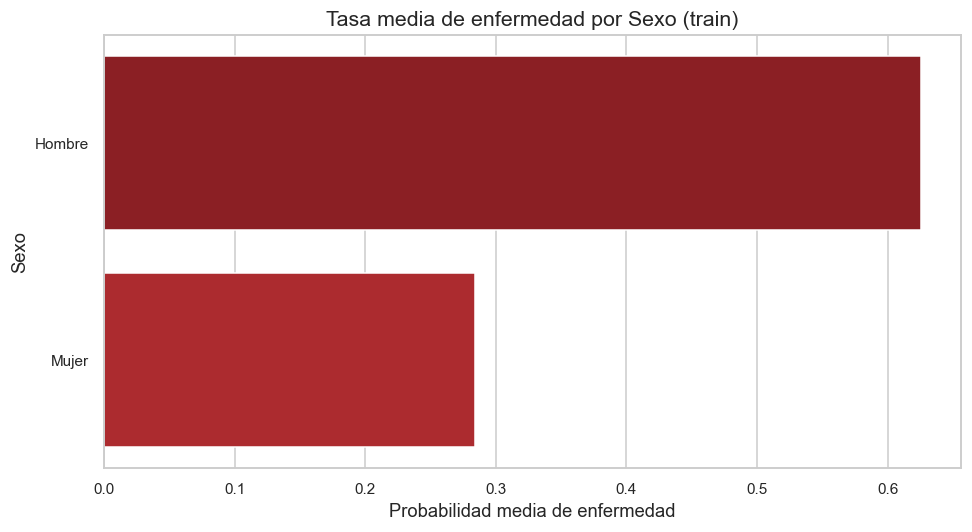

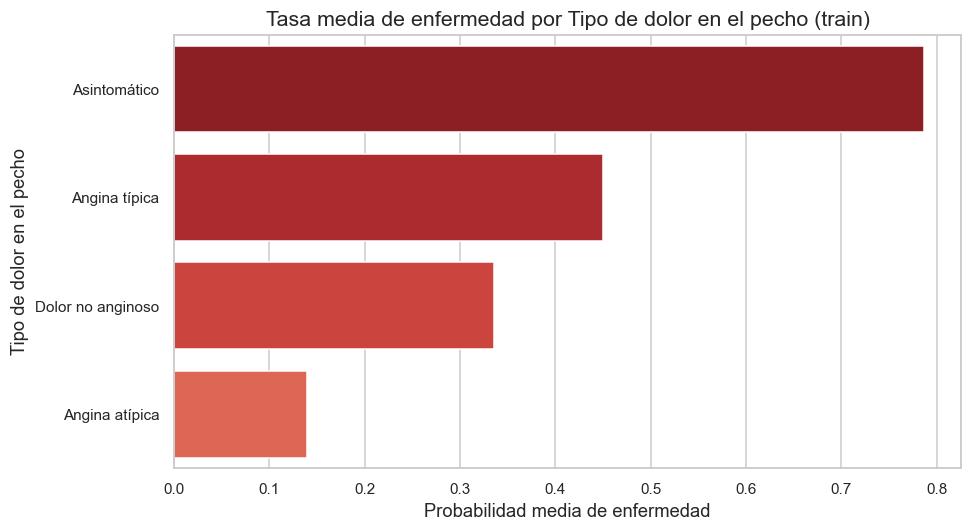

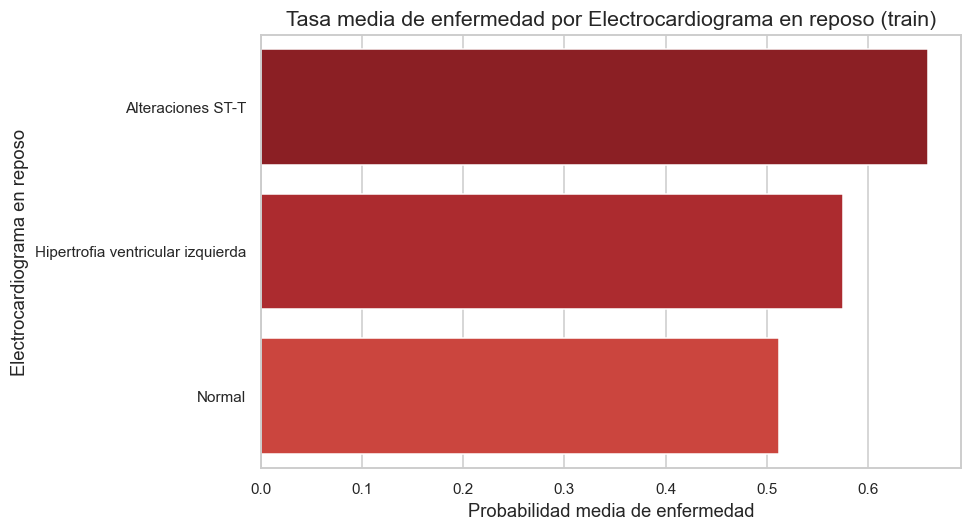

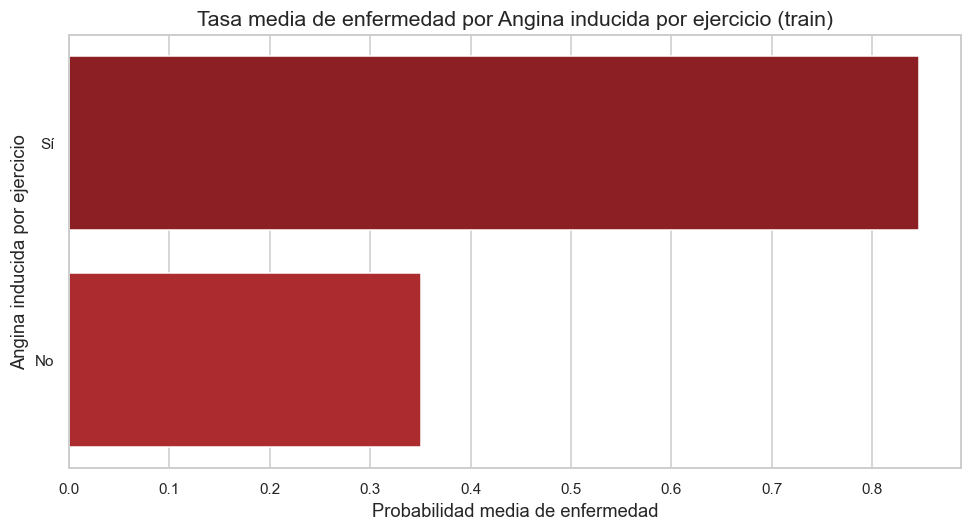

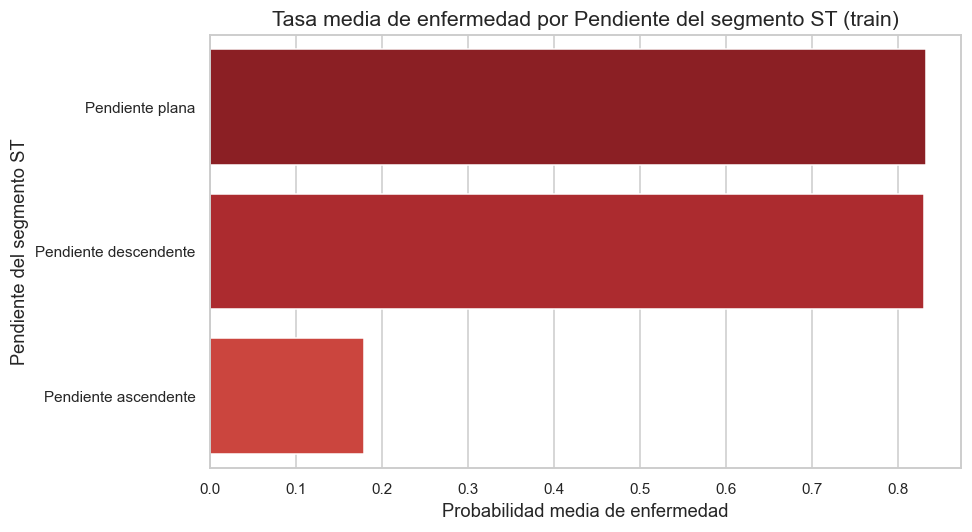


=== Baseline (LogReg balanced) — CV en TRAIN (media ± std) ===
roc_auc: 0.925 ± 0.037
avg_precision: 0.934 ± 0.034
recall_pos: 0.852 ± 0.028
precision_pos: 0.861 ± 0.049
f1_pos: 0.856 ± 0.030

=== GridSearchCV por modelo (TRAIN CV) + evaluación en TEST (solo comparativa) ===

=== Ranking (ordenado por ROC-AUC en TEST) ===
            modelo  cv_best_roc_auc  test_roc_auc  test_pr_auc  test_f1
               KNN         0.929843      0.948470     0.946997 0.922330
               SVC         0.925321      0.946915     0.951262 0.888889
           XGBoost         0.935368      0.934481     0.935658 0.912621
LogisticRegression         0.925302      0.932329     0.938976 0.904762
  GradientBoosting         0.930463      0.931851     0.938461 0.918660
      RandomForest         0.933497      0.931492     0.927720 0.909953


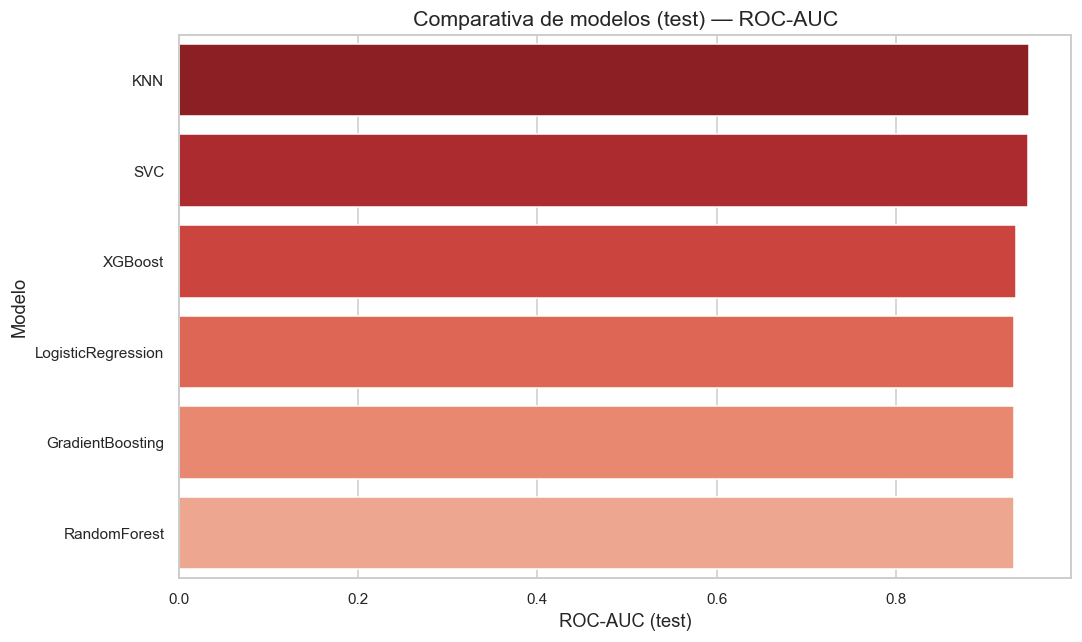

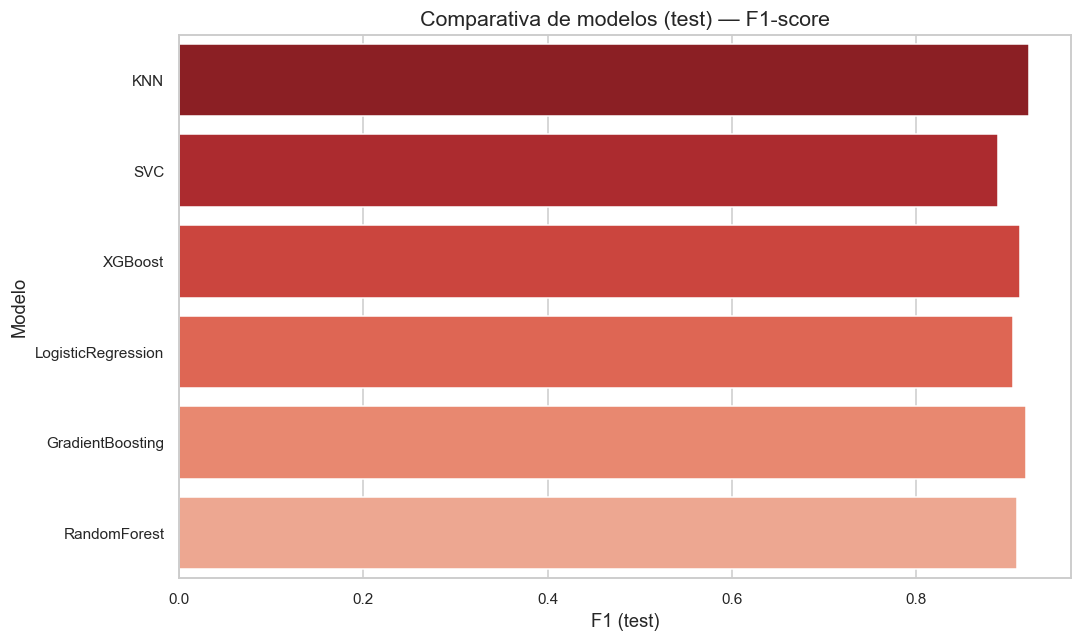

[I 2025-12-29 09:30:27,898] A new study created in memory with name: no-name-90ffc816-46ac-4321-be57-8084788d6cf1
[I 2025-12-29 09:30:27,942] Trial 0 finished with value: 0.9246080427652243 and parameters: {'n_neighbors': 38, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.9246080427652243.
[I 2025-12-29 09:30:27,979] Trial 1 finished with value: 0.9298429995177961 and parameters: {'n_neighbors': 31, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,016] Trial 2 finished with value: 0.9282598762273558 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,055] Trial 3 finished with value: 0.9175606808127134 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9298429995177961.



>>> Modelo ganador (por ROC-AUC en test, comparativa): KNN


[I 2025-12-29 09:30:28,103] Trial 4 finished with value: 0.9294281077749913 and parameters: {'n_neighbors': 34, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,152] Trial 5 finished with value: 0.9282598762273558 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,190] Trial 6 finished with value: 0.922605051277138 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,227] Trial 7 finished with value: 0.9076895773101736 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,264] Trial 8 finished with value: 0.9204136423648619 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.9298429995177961.
[I 2025-12-29 09:30:28,301] Trial 9 finished w


=== Optuna (CV en TRAIN) sobre el modelo ganador ===
Best CV score: 0.9310626591114396
Best params: {'n_neighbors': 45, 'weights': 'distance', 'p': 1}

=== Selección de umbral (VALIDACIÓN dentro de TRAIN) ===
Precision@0.5 = 0.848 | min_precision = 0.828
Best threshold = 0.395 | Precision = 0.835 | Recall = 0.892


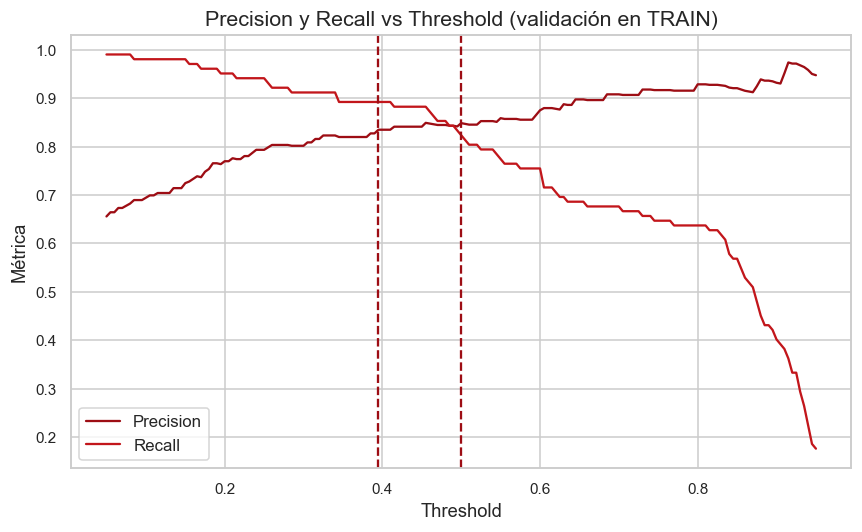


=== Evaluación FINAL en TEST (umbral ajustado) ===
Modelo final (Optuna): KNN
Threshold final: 0.395
ROC-AUC (test): 0.950
PR-AUC / Average Precision (test): 0.951
Specificity (TNR) (test): 0.854

              precision    recall  f1-score   support

          No       0.92      0.85      0.89        82
          Sí       0.89      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



<Figure size 715x528 with 0 Axes>

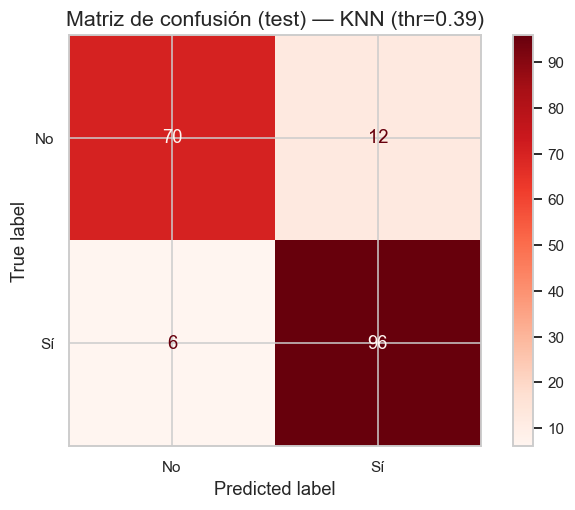

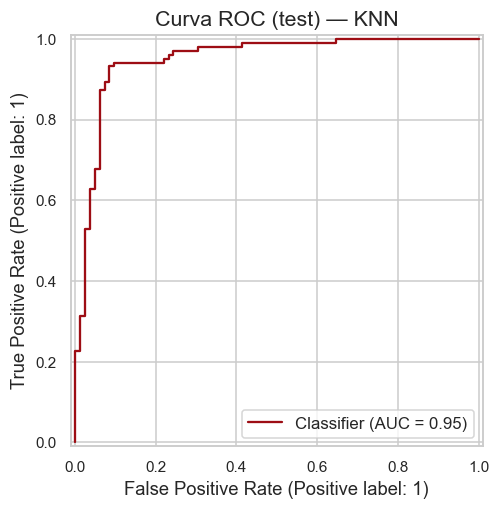

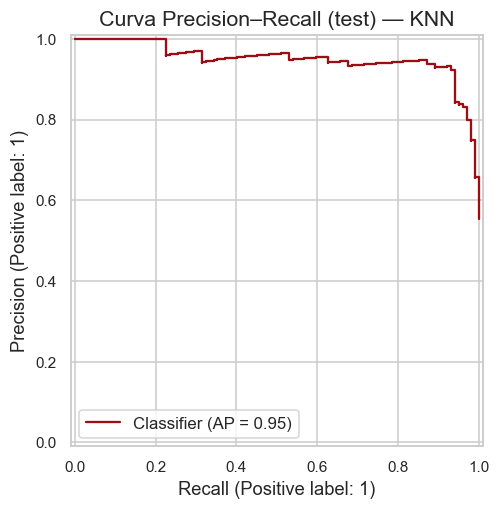


✅ Modelo final guardado en: model\modelo_final.pkl

=== Tabla resumen de modelos (recortada para memoria) ===
            modelo  cv_best_roc_auc  test_roc_auc  test_pr_auc  test_f1  test_recall  test_precision                                              me_justifico
               KNN         0.929843      0.948470     0.946997 0.922330     0.931373        0.913462         Baseline no paramétrico; sensible al escalado....
               SVC         0.925321      0.946915     0.951262 0.888889     0.901961        0.876190          Capta fronteras complejas; requiere escalado....
           XGBoost         0.935368      0.934481     0.935658 0.912621     0.921569        0.903846   Candidato final productivo en tabular; regularizado....
LogisticRegression         0.925302      0.932329     0.938976 0.904762     0.931373        0.879630                   Baseline interpretable y defendible....
  GradientBoosting         0.930463      0.931851     0.938461 0.918660     0.941176        0.

In [ ]:
# ============================================================
# PROYECTO ML (NIVEL MÁSTER) — HeartDisease
# Versión ampliada:
# - EDA completo + baseline defendible + benchmarking multi-modelo
# - Optuna sobre el modelo ganador (hiperparámetros)
# - Ajuste de umbral (threshold) para mejorar Recall
#
# Principios que sigo (y que justifico en la memoria):
# - Hago split train/test ANTES de EDA (evito leakage)
# - Tomo decisiones (EDA, hiperparámetros, umbral) usando SOLO TRAIN
# - Reservo TEST para evaluación final (1 única vez, sin “mirarlo” para decidir)
# ============================================================

import os
import pickle
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    cross_validate,
    cross_val_score,
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import clone

from sklearn.feature_selection import chi2, mutual_info_classif

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)

# Optuna para tuning más fino que Grid/Random cuando el espacio crece
import optuna

warnings.filterwarnings("ignore")

# ============================================================
# 0) CONFIG
# ============================================================
DATA_PATH = "data/heart.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.20

PRIMARY_SCORING = "roc_auc"  # métrica principal para selección del modelo
SAVE_MODEL = True
MODEL_DIR = "model"
MODEL_PATH = os.path.join(MODEL_DIR, "modelo_final.pkl")

PLOT = True  # si lo pongo a False, acelero ejecuciones quitando gráficos

# ============================================================
# 1) ESTILO GLOBAL
# ============================================================
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Reds_r", 8)
sns.set_palette(palette)
plt.rcParams.update({
    "figure.dpi": 110,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

def add_caption(text: str, y_offset: float = -0.06) -> None:
    plt.figtext(0.5, y_offset, text, ha="center", fontsize=9, color="gray")

# ============================================================
# 2) CARGA + RENOMBRADO A ESPAÑOL
# ============================================================
df_raw = pd.read_csv(DATA_PATH)

RENAME = {
    "Age": "edad",
    "Sex": "sexo",
    "ChestPainType": "tipo_dolor_pecho",
    "RestingBP": "presion_reposo",
    "Cholesterol": "colesterol",
    "FastingBS": "glucosa_ayunas",
    "RestingECG": "ecg_reposo",
    "MaxHR": "fc_max",
    "ExerciseAngina": "angina_ejercicio",
    "Oldpeak": "oldpeak",
    "ST_Slope": "pendiente_st",
    "HeartDisease": "enfermedad_cardiaca"
}
df = df_raw.rename(columns=RENAME).copy()

TARGET = "enfermedad_cardiaca"

LABELS = {
    "edad": "Edad del paciente (años)",
    "sexo": "Sexo",
    "tipo_dolor_pecho": "Tipo de dolor en el pecho",
    "presion_reposo": "Presión arterial en reposo (mm Hg)",
    "colesterol": "Colesterol sérico (mg/dl)",
    "glucosa_ayunas": "Glucosa en ayunas > 120 mg/dl",
    "ecg_reposo": "Electrocardiograma en reposo",
    "fc_max": "Frecuencia cardíaca máxima alcanzada",
    "angina_ejercicio": "Angina inducida por ejercicio",
    "oldpeak": "Depresión del segmento ST (oldpeak)",
    "pendiente_st": "Pendiente del segmento ST",
    "enfermedad_cardiaca": "Enfermedad cardíaca",
}

def label(col: str) -> str:
    return LABELS.get(col, col)

CATEGORY_VALUES = {
    "sexo": {"M": "Hombre", "F": "Mujer"},
    "angina_ejercicio": {"Y": "Sí", "N": "No"},
    "tipo_dolor_pecho": {
        "ASY": "Asintomático",
        "ATA": "Angina atípica",
        "NAP": "Dolor no anginoso",
        "TA": "Angina típica"
    },
    "ecg_reposo": {
        "Normal": "Normal",
        "ST": "Alteraciones ST-T",
        "LVH": "Hipertrofia ventricular izquierda"
    },
    "pendiente_st": {
        "Up": "Pendiente ascendente",
        "Flat": "Pendiente plana",
        "Down": "Pendiente descendente"
    }
}

def translate_levels_for_plot(df_plot: pd.DataFrame, col: str) -> pd.DataFrame:
    """Traduce niveles categóricos SOLO para visualización."""
    out = df_plot.copy()
    if col in CATEGORY_VALUES:
        out[col] = out[col].map(CATEGORY_VALUES[col]).fillna(out[col])
    return out

# ============================================================
# 3) HOLD-OUT SPLIT (antes de EDA para evitar leakage)
# ============================================================
X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)

# ============================================================
# 4) TIPOS DE VARIABLES
# ============================================================
categorical_cols = ["sexo", "tipo_dolor_pecho", "ecg_reposo", "angina_ejercicio", "pendiente_st"]
binary_cols = ["glucosa_ayunas"]
numeric_cols = ["edad", "presion_reposo", "colesterol", "fc_max", "oldpeak"]
ALL_BASE_COLS = set(categorical_cols + binary_cols + numeric_cols)

def nice_feature_name(feat: str) -> str:
    """
    Formatea nombres de features para plots:
    - original: 'fc_max' -> etiqueta humana
    - one-hot: 'pendiente_st_Up' -> 'Pendiente del segmento ST = Pendiente ascendente'
    """
    if feat in ALL_BASE_COLS:
        return label(feat)

    matched_base = None
    for base in categorical_cols:
        prefix = base + "_"
        if feat.startswith(prefix):
            if matched_base is None or len(base) > len(matched_base):
                matched_base = base

    if matched_base is not None:
        val = feat[len(matched_base) + 1:]
        val_label = CATEGORY_VALUES.get(matched_base, {}).get(val, val)
        return f"{label(matched_base)} = {val_label}"

    return feat

# ============================================================
# 5) EDA (solo TRAIN)
# ============================================================
def eda_train(Xtr: pd.DataFrame, ytr: pd.Series) -> None:
    # 5.1 Distribución del target
    if PLOT:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=ytr, palette=palette)
        plt.title("Distribución del diagnóstico (train)")
        plt.xlabel(label(TARGET))
        plt.ylabel("Número de pacientes")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

    # 5.2 Correlación numéricas + target (trato ceros sospechosos como NaN solo para EDA)
    num_df = pd.concat([Xtr[numeric_cols + binary_cols], ytr.rename(TARGET)], axis=1).copy()
    for c in ["presion_reposo", "colesterol", "fc_max"]:
        if c in num_df.columns:
            num_df[c] = num_df[c].replace(0, np.nan)

    corr_num = num_df.corr(numeric_only=True)

    if PLOT:
        plt.figure(figsize=(12, 9))
        sns.heatmap(corr_num, annot=True, fmt=".2f", linewidths=0.5, square=True)
        plt.title("Matriz de correlación (train: variables numéricas + target)")
        add_caption("Uso train para evitar leakage. Algunos ceros sospechosos se tratan como NaN (solo EDA).")
        plt.tight_layout()
        plt.show()

    # 5.3 Ranking |corr| con el target (numéricas)
    corr_target_num = (
        corr_num[TARGET]
        .drop(labels=[TARGET])
        .abs()
        .sort_values(ascending=False)
    )

    if PLOT:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=corr_target_num.values,
            y=[label(c) for c in corr_target_num.index],
            palette=palette
        )
        plt.title("Correlación absoluta con el target (train: solo numéricas)")
        plt.xlabel("|corr|")
        plt.ylabel("Variable")
        plt.tight_layout()
        plt.show()

    # 5.4 Boxplots por clase
    train_df = Xtr.copy()
    train_df[TARGET] = ytr

    if PLOT:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=TARGET, y="fc_max", data=train_df)
        plt.title("Frecuencia cardíaca máxima según diagnóstico (train)")
        plt.xlabel(label(TARGET))
        plt.ylabel(label("fc_max"))
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 4))
        sns.boxplot(x=TARGET, y="oldpeak", data=train_df)
        plt.title("Oldpeak según diagnóstico (train)")
        plt.xlabel(label(TARGET))
        plt.ylabel(label("oldpeak"))
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

    # 5.5 Chi² para categóricas (solo asociación categórica vs target)
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    X_cat_train = ohe.fit_transform(Xtr[categorical_cols])
    cat_feature_names = ohe.get_feature_names_out(categorical_cols)

    chi2_scores, chi2_p = chi2(X_cat_train, ytr)

    chi2_df = pd.DataFrame({
        "feature": cat_feature_names,
        "chi2": chi2_scores,
        "p_value": chi2_p
    }).sort_values("chi2", ascending=False)

    top_k_cat = 15
    chi2_plot = chi2_df.head(top_k_cat).copy()
    chi2_plot["feature_nice"] = chi2_plot["feature"].apply(nice_feature_name)

    if PLOT:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=chi2_plot, x="chi2", y="feature_nice", palette=palette)
        plt.title(f"Chi² (train): Top {top_k_cat} categorías más asociadas al target")
        plt.xlabel("Estadístico Chi² (mayor = más asociación)")
        plt.ylabel("Categoría")
        add_caption("Chi² es adecuado para categóricas vs target.")
        plt.tight_layout()
        plt.show()

    # 5.6 Mutual Information (mixto)
    X_mi = Xtr.copy()
    for c in numeric_cols:
        X_mi[c] = pd.to_numeric(X_mi[c], errors="coerce")
        if c in ["presion_reposo", "colesterol", "fc_max"]:
            X_mi[c] = X_mi[c].replace(0, np.nan)
        X_mi[c] = X_mi[c].fillna(X_mi[c].median())

    pre_mi = ColumnTransformer(
        transformers=[
            ("num", "passthrough", numeric_cols + binary_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ],
        remainder="drop"
    )
    X_pre = pre_mi.fit_transform(X_mi)

    cat_names = list(pre_mi.named_transformers_["cat"].get_feature_names_out(categorical_cols))
    feature_names = (numeric_cols + binary_cols) + cat_names

    mi = mutual_info_classif(X_pre, ytr, random_state=RANDOM_STATE)
    mi_df = pd.DataFrame({"feature": feature_names, "mi": mi}).sort_values("mi", ascending=False)

    top_k_mi = 20
    mi_plot = mi_df.head(top_k_mi).copy()
    mi_plot["feature_nice"] = mi_plot["feature"].apply(nice_feature_name)

    if PLOT:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=mi_plot, x="mi", y="feature_nice", palette=palette)
        plt.title(f"Mutual Information (train): Top {top_k_mi} variables más informativas")
        plt.xlabel("MI (mayor = más información sobre el target)")
        plt.ylabel("Variable")
        add_caption("MI captura relaciones no lineales y sirve para variables mixtas.")
        plt.tight_layout()
        plt.show()

    # 5.7 VIF multicolinealidad (numéricas)
    X_vif = Xtr[numeric_cols].copy()
    for c in X_vif.columns:
        X_vif[c] = pd.to_numeric(X_vif[c], errors="coerce")
        if c in ["presion_reposo", "colesterol", "fc_max"]:
            X_vif[c] = X_vif[c].replace(0, np.nan)
        X_vif[c] = X_vif[c].fillna(X_vif[c].median())

    X_vif_const = sm.add_constant(X_vif)

    vif_rows = []
    for i, col in enumerate(X_vif_const.columns):
        if col == "const":
            continue
        vif_rows.append({"variable": col, "VIF": variance_inflation_factor(X_vif_const.values, i)})

    vif_df = pd.DataFrame(vif_rows).sort_values("VIF", ascending=False)

    if PLOT:
        plt.figure(figsize=(9, 4.8))
        sns.barplot(data=vif_df, x="VIF", y="variable", palette=palette)
        plt.title("VIF (train): multicolinealidad en variables numéricas")
        plt.xlabel("VIF (mayor = más redundancia)")
        plt.ylabel("Variable")
        plt.yticks(
            ticks=range(len(vif_df["variable"])),
            labels=[label(v) for v in vif_df["variable"]]
        )
        add_caption("Si VIF es alto, puedo considerar regularización o eliminar redundancias.")
        plt.tight_layout()
        plt.show()

    # 5.8 Tasa media del target por categoría
    if PLOT:
        for col in categorical_cols:
            tmp = pd.DataFrame({col: Xtr[col], TARGET: ytr}).dropna()
            tmp = translate_levels_for_plot(tmp, col)

            rate = tmp.groupby(col)[TARGET].mean().sort_values(ascending=False).reset_index()

            plt.figure(figsize=(9, 5))
            sns.barplot(data=rate, x=TARGET, y=col, palette=palette)
            plt.title(f"Tasa media de enfermedad por {label(col)} (train)")
            plt.xlabel("Probabilidad media de enfermedad")
            plt.ylabel(label(col))
            plt.tight_layout()
            plt.show()

# Ejecutar EDA (solo train)
eda_train(X_train, y_train)

# ============================================================
# 6) PREPROCESADO (pipelines)
# ============================================================
# Nota: aquí imputo NaN. En este dataset hay ceros no fisiológicos en algunas columnas,
# pero para mantener el ejemplo simple y reproducible, sigo tu imputación. Si quieres,
# puedo añadir un paso que convierta 0->NaN en columnas concretas ANTES de imputar.
numeric_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", numeric_imputer),
            ("scaler", StandardScaler())
        ]), numeric_cols + binary_cols),
        ("cat", Pipeline(steps=[
            ("imputer", cat_imputer),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ],
    remainder="drop"
)

preprocess_noscale = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", numeric_imputer)
        ]), numeric_cols + binary_cols),
        ("cat", Pipeline(steps=[
            ("imputer", cat_imputer),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ],
    remainder="drop"
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# ============================================================
# 7) BASELINE DEFENDIBLE — LogReg balanced + CV
# ============================================================
baseline_pipe = Pipeline(steps=[
    ("preprocess", ColumnTransformer(
        transformers=[
            ("num", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]), numeric_cols),
            ("bin", SimpleImputer(strategy="most_frequent"), binary_cols),
            ("cat", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehot", OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_cols),
        ],
        remainder="drop"
    )),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",  # yo lo pongo para ayudar al recall si hay desbalance
        random_state=RANDOM_STATE
    ))
])

scoring = {
    "roc_auc": "roc_auc",
    "avg_precision": "average_precision",
    "recall_pos": "recall",
    "precision_pos": "precision",
    "f1_pos": "f1"
}

cv_results = cross_validate(
    baseline_pipe,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

cv_summary = {k: (np.mean(v), np.std(v)) for k, v in cv_results.items() if k.startswith("test_")}

print("\n=== Baseline (LogReg balanced) — CV en TRAIN (media ± std) ===")
for k, (m, s) in cv_summary.items():
    print(f"{k.replace('test_','')}: {m:.3f} ± {s:.3f}")

# ============================================================
# 8) BENCHMARK MULTI-MODELO — GridSearchCV (rápido y defendible)
# ============================================================
def evaluate_on_test(model, Xte, yte) -> dict:
    # Yo evalúo con predicción dura (0/1) y con probabilidades para AUC.
    y_pred = model.predict(Xte)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(Xte)[:, 1]
    else:
        # Si el modelo no da probas, normalizo decision_function a [0,1]
        scores = model.decision_function(Xte)
        y_proba = (scores - scores.min()) / (scores.max() - scores.min() + 1e-12)

    return {
        "accuracy": accuracy_score(yte, y_pred),
        "precision": precision_score(yte, y_pred, zero_division=0),
        "recall": recall_score(yte, y_pred, zero_division=0),
        "f1": f1_score(yte, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(yte, y_proba),
        "pr_auc": average_precision_score(yte, y_proba),
    }

# XGBoost opcional
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False

models = []

models.append({
    "name": "LogisticRegression",
    "pipeline": Pipeline(steps=[
        ("preprocess", preprocess_scaled),
        ("model", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))
    ]),
    "param_grid": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs"]
    },
    "why": "Baseline interpretable y defendible."
})

models.append({
    "name": "SVC",
    "pipeline": Pipeline(steps=[
        ("preprocess", preprocess_scaled),
        ("model", SVC(probability=True, random_state=RANDOM_STATE))
    ]),
    "param_grid": {
        "model__C": [0.1, 1, 10],
        "model__kernel": ["rbf", "linear"],
        "model__gamma": ["scale", "auto"]
    },
    "why": "Capta fronteras complejas; requiere escalado."
})

models.append({
    "name": "KNN",
    "pipeline": Pipeline(steps=[
        ("preprocess", preprocess_scaled),
        ("model", KNeighborsClassifier())
    ]),
    "param_grid": {
        "model__n_neighbors": [5, 11, 21, 31],
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2]
    },
    "why": "Baseline no paramétrico; sensible al escalado."
})

models.append({
    "name": "RandomForest",
    "pipeline": Pipeline(steps=[
        ("preprocess", preprocess_noscale),
        ("model", RandomForestClassifier(random_state=RANDOM_STATE))
    ]),
    "param_grid": {
        "model__n_estimators": [200, 500],
        "model__max_depth": [None, 3, 5, 8],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    },
    "why": "Robusto en tabular; no necesita escalado."
})

models.append({
    "name": "GradientBoosting",
    "pipeline": Pipeline(steps=[
        ("preprocess", preprocess_noscale),
        ("model", GradientBoostingClassifier(random_state=RANDOM_STATE))
    ]),
    "param_grid": {
        "model__n_estimators": [200, 400],
        "model__learning_rate": [0.03, 0.05, 0.1],
        "model__max_depth": [2, 3]
    },
    "why": "Boosting suele capturar interacciones y no linealidad."
})

if HAS_XGB:
    models.append({
        "name": "XGBoost",
        "pipeline": Pipeline(steps=[
            ("preprocess", preprocess_noscale),
            ("model", XGBClassifier(
                random_state=RANDOM_STATE,
                eval_metric="logloss",
                n_jobs=-1
            ))
        ]),
        "param_grid": {
            "model__n_estimators": [300, 600],
            "model__learning_rate": [0.03, 0.05, 0.1],
            "model__max_depth": [2, 3, 4],
            "model__subsample": [0.8, 1.0],
            "model__colsample_bytree": [0.8, 1.0],
            "model__reg_lambda": [1.0, 5.0, 10.0]
        },
        "why": "Candidato final productivo en tabular; regularizado."
    })
else:
    models.append({
        "name": "HistGradientBoosting",
        "pipeline": Pipeline(steps=[
            ("preprocess", preprocess_noscale),
            ("model", HistGradientBoostingClassifier(random_state=RANDOM_STATE))
        ]),
        "param_grid": {
            "model__learning_rate": [0.03, 0.05, 0.1],
            "model__max_depth": [3, 5, None],
            "model__max_iter": [300, 600]
        },
        "why": "Boosting moderno en sklearn si XGBoost no está."
    })

results = []
best_estimators = {}

print("\n=== GridSearchCV por modelo (TRAIN CV) + evaluación en TEST (solo comparativa) ===")
for spec in models:
    # Yo uso CV en TRAIN para elegir hiperparámetros del modelo
    gs = GridSearchCV(
        estimator=spec["pipeline"],
        param_grid=spec["param_grid"],
        scoring=PRIMARY_SCORING,
        cv=cv,
        n_jobs=-1,
        refit=True
    )
    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_
    best_estimators[spec["name"]] = best_model

    # Nota metodológica:
    # aquí muestro métricas de TEST para comparar modelos,
    # pero NO toco decisiones del umbral con el test.
    test_metrics = evaluate_on_test(best_model, X_test, y_test)

    results.append({
        "modelo": spec["name"],
        "cv_best_roc_auc": gs.best_score_,
        "test_accuracy": test_metrics["accuracy"],
        "test_precision": test_metrics["precision"],
        "test_recall": test_metrics["recall"],
        "test_f1": test_metrics["f1"],
        "test_roc_auc": test_metrics["roc_auc"],
        "test_pr_auc": test_metrics["pr_auc"],
        "me_justifico": spec["why"]
    })

results_df = pd.DataFrame(results).sort_values("test_roc_auc", ascending=False)

print("\n=== Ranking (ordenado por ROC-AUC en TEST) ===")
print(results_df[["modelo", "cv_best_roc_auc", "test_roc_auc", "test_pr_auc", "test_f1"]].to_string(index=False))

if PLOT:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x="test_roc_auc", y="modelo", palette=palette)
    plt.title("Comparativa de modelos (test) — ROC-AUC")
    plt.xlabel("ROC-AUC (test)")
    plt.ylabel("Modelo")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x="test_f1", y="modelo", palette=palette)
    plt.title("Comparativa de modelos (test) — F1-score")
    plt.xlabel("F1 (test)")
    plt.ylabel("Modelo")
    plt.tight_layout()
    plt.show()

# ============================================================
# 9) OPTUNA — hiperparámetros finos sobre el modelo ganador
# ============================================================
# Aquí hago exactamente lo que me pide el profesor:
# uso Optuna para mejorar hiperparámetros "sobre lo que ya tengo".
best_name = results_df.iloc[0]["modelo"]
print(f"\n>>> Modelo ganador (por ROC-AUC en test, comparativa): {best_name}")

def build_optuna_pipeline(model_name: str, params: dict) -> Pipeline:
    """
    Yo clono el pipeline ganador y le inyecto parámetros al estimador.
    Optuna devuelve keys sin 'model__', así que aquí las convierto.
    """
    pipe = clone(best_estimators[model_name])
    pipe.set_params(**{f"model__{k}": v for k, v in params.items()})
    return pipe

def objective(trial):
    # Defino el espacio de búsqueda en función del modelo ganador.
    # Esto evita buscar parámetros que no existen.
    if best_name == "LogisticRegression":
        params = {
            "C": trial.suggest_float("C", 1e-3, 1e2, log=True),
            "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
        }

    elif best_name == "SVC":
        params = {
            "C": trial.suggest_float("C", 1e-2, 1e2, log=True),
            "kernel": trial.suggest_categorical("kernel", ["rbf", "linear"]),
            "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
        }

    elif best_name == "KNN":
        params = {
            "n_neighbors": trial.suggest_int("n_neighbors", 3, 45),
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
            "p": trial.suggest_categorical("p", [1, 2]),
        }

    elif best_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 200, 1200),
            "max_depth": trial.suggest_categorical("max_depth", [None, 3, 5, 8, 12]),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 15),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
            "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
        }

    elif best_name in ["GradientBoosting", "HistGradientBoosting"]:
        params = {
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
            "max_depth": trial.suggest_categorical("max_depth", [2, 3, 4, 5, None]),
        }
        if best_name == "HistGradientBoosting":
            params["max_iter"] = trial.suggest_int("max_iter", 200, 1200)

    elif best_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
            "max_depth": trial.suggest_int("max_depth", 2, 6),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 1.0, 20.0),
        }
    else:
        params = {}

    pipe = build_optuna_pipeline(best_name, params)

    # Yo optimizo roc_auc con CV estratificada en TRAIN
    score = cross_val_score(
        pipe, X_train, y_train,
        cv=cv,
        scoring=PRIMARY_SCORING,
        n_jobs=-1
    ).mean()

    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("\n=== Optuna (CV en TRAIN) sobre el modelo ganador ===")
print("Best CV score:", study.best_value)
print("Best params:", study.best_params)

# Con los mejores hiperparámetros, yo refiteo el pipeline en TODO TRAIN
final_model = build_optuna_pipeline(best_name, study.best_params)
final_model.fit(X_train, y_train)

# ============================================================
# 10) AJUSTE DE UMBRAL (threshold) PARA MEJORAR RECALL
# ============================================================
# Importante:
# - NO elijo el umbral mirando el TEST.
# - Yo creo una validación interna dentro de TRAIN para escoger threshold.
# - Luego fijo ese threshold y SOLO ENTONCES evalúo en TEST.

X_fit, X_val, y_fit, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,
    stratify=y_train,
    random_state=RANDOM_STATE
)

# Re-entreno en X_fit porque estoy simulando el proceso real:
# entreno -> escojo umbral en validación -> evalúo en test.
final_model.fit(X_fit, y_fit)

# Probabilidades para clase positiva en validación
if hasattr(final_model, "predict_proba"):
    proba_val = final_model.predict_proba(X_val)[:, 1]
else:
    scores = final_model.decision_function(X_val)
    proba_val = (scores - scores.min()) / (scores.max() - scores.min() + 1e-12)

thresholds = np.linspace(0.05, 0.95, 181)

rows = []
for t in thresholds:
    y_pred_t = (proba_val >= t).astype(int)
    prec = precision_score(y_val, y_pred_t, zero_division=0)
    rec  = recall_score(y_val, y_pred_t, zero_division=0)
    rows.append((t, prec, rec))

thr_df = pd.DataFrame(rows, columns=["threshold", "precision", "recall"])

# Regla que uso (muy en línea con el comentario del profesor):
# "subo Recall sin afectar mucho Precision".
# Concretamente: permito caer como máximo 0.02 respecto a precision@0.5.
t0 = 0.5
prec0 = thr_df.loc[(thr_df["threshold"] - t0).abs().idxmin(), "precision"]
min_prec = max(0.0, prec0 - 0.02)

candidates = thr_df[thr_df["precision"] >= min_prec]
if len(candidates) > 0:
    best_row = candidates.sort_values("recall", ascending=False).iloc[0]
else:
    best_row = thr_df.sort_values("recall", ascending=False).iloc[0]

best_threshold = float(best_row["threshold"])

print("\n=== Selección de umbral (VALIDACIÓN dentro de TRAIN) ===")
print(f"Precision@0.5 = {prec0:.3f} | min_precision = {min_prec:.3f}")
print(f"Best threshold = {best_threshold:.3f} | Precision = {best_row['precision']:.3f} | Recall = {best_row['recall']:.3f}")

if PLOT:
    plt.figure(figsize=(8, 5))
    plt.plot(thr_df["threshold"], thr_df["precision"], label="Precision")
    plt.plot(thr_df["threshold"], thr_df["recall"], label="Recall")
    plt.axvline(0.5, linestyle="--")
    plt.axvline(best_threshold, linestyle="--")
    plt.title("Precision y Recall vs Threshold (validación en TRAIN)")
    plt.xlabel("Threshold")
    plt.ylabel("Métrica")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ============================================================
# 11) EVALUACIÓN FINAL EN TEST (con threshold fijado)
# ============================================================
# Ahora sí: entreno con TODO TRAIN (ya que el threshold está decidido)
final_model.fit(X_train, y_train)

# Calculo probabilidades en TEST
if hasattr(final_model, "predict_proba"):
    y_proba_final = final_model.predict_proba(X_test)[:, 1]
else:
    scores = final_model.decision_function(X_test)
    y_proba_final = (scores - scores.min()) / (scores.max() - scores.min() + 1e-12)

# Predicción final usando el UMBRAL elegido
y_pred_final = (y_proba_final >= best_threshold).astype(int)

roc_final = roc_auc_score(y_test, y_proba_final)
ap_final = average_precision_score(y_test, y_proba_final)

# Specificity (TNR) me viene bien en salud para complementar Recall (sensibilidad)
cm = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp + 1e-12)

print("\n=== Evaluación FINAL en TEST (umbral ajustado) ===")
print(f"Modelo final (Optuna): {best_name}")
print(f"Threshold final: {best_threshold:.3f}")
print(f"ROC-AUC (test): {roc_final:.3f}")
print(f"PR-AUC / Average Precision (test): {ap_final:.3f}")
print(f"Specificity (TNR) (test): {specificity:.3f}\n")
print(classification_report(y_test, y_pred_final, target_names=["No", "Sí"]))

if PLOT:
    plt.figure(figsize=(6.5, 4.8))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_final,
        display_labels=["No", "Sí"],
        values_format="d",
        cmap="Reds"
    )
    plt.title(f"Matriz de confusión (test) — {best_name} (thr={best_threshold:.2f})")
    plt.tight_layout()
    plt.show()

    RocCurveDisplay.from_predictions(y_test, y_proba_final)
    plt.title(f"Curva ROC (test) — {best_name}")
    plt.tight_layout()
    plt.show()

    PrecisionRecallDisplay.from_predictions(y_test, y_proba_final)
    plt.title(f"Curva Precision–Recall (test) — {best_name}")
    plt.tight_layout()
    plt.show()

# ============================================================
# 12) GUARDADO DEL MODELO FINAL
# ============================================================
# Yo guardo el pipeline entero (preprocess + modelo) para reproducibilidad.
if SAVE_MODEL:
    os.makedirs(MODEL_DIR, exist_ok=True)
    with open(MODEL_PATH, "wb") as f:
        pickle.dump(final_model, f)
    print(f"\n✅ Modelo final guardado en: {MODEL_PATH}")

# ============================================================
# 13) TABLA RESUMEN (lista para memoria)
# ============================================================
results_df_display = results_df.copy()
results_df_display["me_justifico"] = results_df_display["me_justifico"].str.slice(0, 120) + "..."
print("\n=== Tabla resumen de modelos (recortada para memoria) ===")
print(results_df_display[["modelo","cv_best_roc_auc","test_roc_auc","test_pr_auc","test_f1","test_recall","test_precision","me_justifico"]]
      .sort_values("test_roc_auc", ascending=False)
      .to_string(index=False))

print("\n========================================== FIN ==========================================")
